# This uses batting distances to illustrate Polynomial Regression

In [2]:
# Import the necesary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import PolynomialFeatures

# Read in the data 
df  = pd.read_csv('./data/batting-angles-distances.csv')
print(df.head())

   Angle    Distance
0     34  253.934210
1     33  270.378070
2     70  158.648806
3     54  234.594933
4     26  250.652104


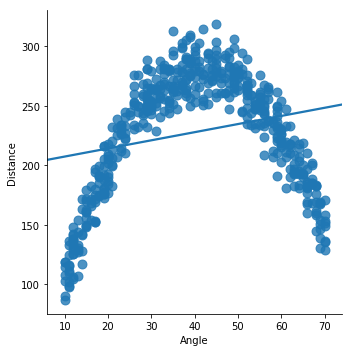

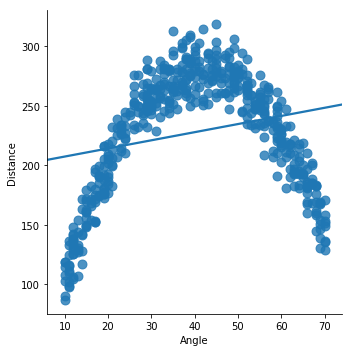

In [3]:
pt1 = sns.lmplot(x='Angle', y='Distance', data=df, order=1, ci=None, scatter_kws={'s':80}) # linear fit 
pt2 = sns.lmplot(x='Angle', y='Distance', data=df, order=1, ci=None, scatter_kws={'s':80}) # Quadratic Fit
plt.show()

In [4]:
# Get the raw data x 
data_x = df[['Angle']]

# Create a quadratic variable preprocessor 
quad = PolynomialFeatures(degree=2)

# Fit and transform the data
data_x_2 = quad.fit_transform(data_x)

# Get the target vector 
data_y = df['Distance']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=4)

# Create, fit, and evaluate linear model
linear_mod = linear_model.LinearRegression()
linear_mod.fit(x_train, y_train)
preds = linear_mod.predict(x_test)
# Look at error metrics:
print('MSE, MAE, R^2, EVS: ' + str([mean_squared_error(y_test, preds),
                                    median_absolute_error(y_test, preds),
                                    r2_score(y_test, preds),
                                    explained_variance_score(y_test, preds)]))

MSE, MAE, R^2, EVS: [3233.8398056120855, 43.785030521140754, 0.00536475751505916, 0.08447669464869245]


In [6]:
x_train, x_test, y_train, y_test = train_test_split(data_x_2, data_y, test_size=0.2, random_state=4)

# Create, fit, and evaluate linear model
linear_mod = linear_model.LinearRegression()
linear_mod.fit(x_train, y_train)
preds = linear_mod.predict(x_test)
# Look at error metrics:
print('MSE, MAE, R^2, EVS: ' + str([mean_squared_error(y_test, preds),
                                    median_absolute_error(y_test, preds),
                                    r2_score(y_test, preds),
                                    explained_variance_score(y_test, preds)]))

MSE, MAE, R^2, EVS: [226.8214086007866, 10.045392313814261, 0.9302363195749834, 0.9307178635820755]
